## Seinfeld Script Natural Language Processing

Our Goals for Natural Language Processing were two-fold; Seinfeld was renowned for the numerous catch-phrases it produced such as, 'yada-yada-yada' or 'Hello, Newman!', also Seinfeld had numerous writers over the years. So, with these in mind, we want to see:

- What were the most numerously said catch-phrases?
- Did writers leave an individual mark on the show?

To these ends we wrote a program to count the catch-phrases and used several Machine Learning Algorithms to classify Seinfeld by writer.

In [1]:
from bs4 import BeautifulSoup 
import re
import urllib 
import requests
import string
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (17,8))
% matplotlib inline

from nltk.corpus import stopwords
english_stops = stopwords.words('english')

### Catch Phrase Counting

Catch Phrases are commonly repeated phrases that are often associated with a particular character, such as Homer Simpsons "Doh!" from the Simpsons (1989-Present) or Sheldon Cooper's (no relation to Nathan) "Bazinga!" from The Big Bang Theory (2007-Present).  Seinfeld popularized several phrases such as 'shrinkage' and 'the jimmy leg' throughout its run.

We want to see what the most frequent catch phrases are and how often they were used. Which were used frequently, and which were only used once but resonated with the audience?

In [2]:
#First step is to scrape the wiki page.
url = 'http://seinfeld.wikia.com/wiki/List_of_Seinfeld_sayings'

source_code = requests.get(url)
html = source_code.text
#print(html)

catch_phrases = re.findall(r'<b>(.*?)</b>', html)# The catch phrases are bold on the page. This looks for text between bold tags

#The next step is to put the phrase in a format that may make it easier to count.
clean_phrases = []
for phrase in catch_phrases:
    phrase = phrase.lower()
    clean_phrases.append(re.sub(r'<.*?>|\"', '', phrase)) #Some phrases were linked to a wiki page, this removes the link tag
print(clean_phrases)

['1st and 1st', 'anti-dentite', 'babka', 'baby', 'bad breaker-upper', 'baldist', 'boys', 'bottle wipe', 'cantstandya!', 'cartwright!', 'close talker', 'coffee table book about coffee tables', 'conjugal visit sex', 'costanza leave behind', 'coup de toe', 'delicate genius', 'double-dipper', 'dry heave set to music', 'even steven', 'festivus', 'fugitive sex', '“get out!”', 'getting upset', 'giddyup!', 'go!', 'gore-tex', 'hand sandwich', 'happy, pappy?', 'hello!', 'hello, newman', 'hello, vargas', 'high talker', 'hipster doofus', 'hoochie mama!', 'the human fund: money for people', 'i am aware', 'i was in the pool!', 'in the vault', "it's not you, it's me", 'john-john', 'kavorka', 'kibosh ', 'laughing and lying', 'low talker', 'lupus?! is it lupus?!', 'make-up sex', 'manssiere/bro', 'man hands', 'master of my domain', 'maybe the dingo ate your baby!', 'mimbo', 'moops', 'mulva', 'newman!', 'no soup for you!', "not that there's anything wrong with that", 'oh, moses, smell the roses!', 'oh, t

In [3]:
print(clean_phrases[-7])

yada yada yada


Now that we have a list of catch phrases our next step is to pull the dialog and format it in a way that will make it easy to do the phrase counting.

In [4]:
dialogue = pd.read_csv('C:\\Users\\Nate\\Documents\\GitHub\\CUNY_DATA_620_GROUP\\Final_Project\\Data\\Seinfield_DialogueSUBSET.csv')

In [5]:
#Explore the dataframe so we can pull the dialog properly.
print(dialogue.head())
print(dialogue.loc[:2,'Dialogue'])

  Character                                           Dialogue  DialogueIndex  \
0     JERRY  Do you know what this is all about? Do you kno...              1   
1     JERRY  (pointing at Georges shirt) See, to me, that b...              1   
2    GEORGE                                   Are you through?              2   
3     JERRY             You do of course try on, when you buy?              3   
4    GEORGE  Yes, it was purple, I liked it, I dont actuall...              4   

     SEID  SceneNum  
0  S01E00  S01E00_1  
1  S01E00  S01E00_2  
2  S01E00  S01E00_2  
3  S01E00  S01E00_2  
4  S01E00  S01E00_2  
0    Do you know what this is all about? Do you kno...
1    (pointing at Georges shirt) See, to me, that b...
2                                     Are you through?
Name: Dialogue, dtype: object


In [6]:
#This loop uses the catch phrases as regular expressions, then uses re.findall to count the number of matchs.
catch_dict = {}
for phrase in clean_phrases:
    utterances = 0 
    for row in dialogue.loc[:,'Dialogue']:
        row = str(row).lower() # not all rows are of type string, we put the dialog to lower case to match the phrases.
        utterances = utterances + len(re.findall(phrase, row))
        #if utterances > 0:
    #print("Matches found, " + str(phrase) + ': ' + str(utterances))
    catch_dict[phrase] = utterances
#print(catch_dict)
catch_df = pd.DataFrame.from_dict(catch_dict, orient='index')
catch_df.rename(columns={0: 'Count'}, inplace=True)
catch_df = catch_df.sort_values(by='Count',ascending=False)
print(catch_df.shape)
print(catch_df.head(21))

(107, 1)
                Count
baby              195
boys               65
go!                44
the tap            39
hello!             30
festivus           28
newman!            23
babka              20
who is this?       18
the move           15
soup nazi          15
moops              14
that's a shame     13
yada yada yada     12
make-up sex        11
serenity now!      10
mulva              10
shrinkage           9
pop-in              9
hello, newman       8
kibosh              8


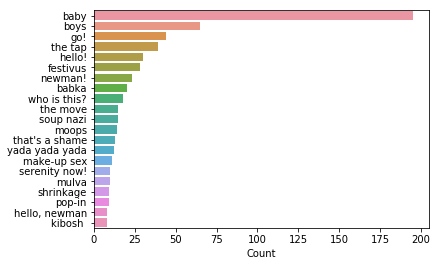

In [7]:
top20_catchs = catch_df.iloc[:21,:]
sn.barplot(x=top20_catchs.Count, y=top20_catchs.index)
plt.show()

In [8]:
catch_df.tail(37)

,Count
they just ... write it off!,0
"they're real, and they're spectacular!",0
costanza leave behind,0
manssiere/bro,0
coup de toe,0
vargas!,0
vile weed!,0
bottle wipe,0
bad breaker-upper,0
you are so good looking,0


In [9]:
#some hard-code searches to see why 37 phrases were missed.

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'first and first', row))
        #if utterances > 0:
print("Matches found, " + 'first and first' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'regift', row))
        #if utterances > 0:
print("Matches found, " + 're-gift|re-gifter' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'schmoopie', row))
        #if utterances > 0:
print("Matches found, " + 'schmoopie' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'past the goalie', row))
        #if utterances > 0:
print("Matches found, " + 'past the goalie' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'pinkus', row))
        #if utterances > 0:
print("Matches found, " + 'pinkus' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'sweet fancy moses', row))
        #if utterances > 0:
print("Matches found, " + 'sweet fancy moses' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'the human fund', row))
        #if utterances > 0:
print("Matches found, " + 'the human fund' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'money for people', row))
        #if utterances > 0:
print("Matches found, " + 'money for people' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'the jerk store called', row))
        #if utterances > 0:
print("Matches found, " + 'the jerk store called' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'sex with the hen', row))
        #if utterances > 0:
print("Matches found, " + 'sex with the hen' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'lupus', row))
        #if utterances > 0:
print("Matches found, " + 'lupus' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'vile', row))
        #if utterances > 0:
print("Matches found, " + 'vile' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'vile weed', row))
        #if utterances > 0:
print("Matches found, " + 'vile weed' + ': ' + str(utterances))



utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'dipper', row))
        #if utterances > 0:
print("Matches found, " + 'dipper' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'dingo', row))
        #if utterances > 0:
print("Matches found, " + 'dingo' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'belt-less', row))
        #if utterances > 0:
print("Matches found, " + 'belt-less' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'manssiere', row))
        #if utterances > 0:
print("Matches found, " + 'manssiere' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'(?<![\w\d])bro(?![\w\d])', row))
        #if utterances > 0:
print("Matches found, " + 'bro' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'matzo', row))
        #if utterances > 0:
print("Matches found, " + 'matzo' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'hipster', row))
        #if utterances > 0:
print("Matches found, " + 'hipster' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'doofus', row))
        #if utterances > 0:
print("Matches found, " + 'doofus' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'talker', row))
        #if utterances > 0:
print("Matches found, " + 'talker' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'cantstandya', row))
        #if utterances > 0:
print("Matches found, " + 'cantstandya' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'sorries', row))
        #if utterances > 0:
print("Matches found, " + 'sorries' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'no yankee', row))
        #if utterances > 0:
print("Matches found, " + 'no yankee' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'(?<![\w\d])coup(?![\w\d])', row))
        #if utterances > 0:
print("Matches found, " + 'coup' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'low-talk', row))
        #if utterances > 0:
print("Matches found, " + 'low talk' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'ten ... minutes', row))
        #if utterances > 0:
print("Matches found, " + 'that\'ll be ... five ... ten ... minutes' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'you are so good looking', row))
        #if utterances > 0:
print("Matches found, " + 'you are so good looking' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'write it off', row))
        #if utterances > 0:
print("Matches found, " + 'write it off' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'they\'re spectacular', row))
        #if utterances > 0:
print("Matches found, " + 'they\'re spectacular' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'breaker-upper', row))
        #if utterances > 0:
print("Matches found, " + 'breaker-upper' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'smell the roses', row))
        #if utterances > 0:
print("Matches found, " + 'smell the roses' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'see the baby', row))
        #if utterances > 0:
print("Matches found, " + 'see the baby' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'the humanity', row))
        #if utterances > 0:
print("Matches found, " + 'the humanity' + ': ' + str(utterances))

utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'get out!', row))
        #if utterances > 0:
print("Matches found, " + 'get out!' + ': ' + str(utterances))


utterances = 0 
for row in dialogue.loc[:,'Dialogue']:
    row = str(row).lower() # not all rows are of type string
    utterances = utterances + len(re.findall(r'hello, vargus', row))
        #if utterances > 0:
print("Matches found, " + 'hello, vargus' + ': ' + str(utterances))

Matches found, first and first: 1
Matches found, re-gift|re-gifter: 5
Matches found, schmoopie: 0
Matches found, past the goalie: 1
Matches found, pinkus: 8
Matches found, sweet fancy moses: 2
Matches found, the human fund: 5
Matches found, money for people: 1
Matches found, the jerk store called: 3
Matches found, sex with the hen: 1
Matches found, lupus: 4
Matches found, vile: 5
Matches found, vile weed: 1
Matches found, dipper: 0
Matches found, dingo: 2
Matches found, belt-less: 2
Matches found, manssiere: 0
Matches found, bro: 12
Matches found, matzo: 4
Matches found, hipster: 3
Matches found, doofus: 8
Matches found, talker: 12
Matches found, cantstandya: 0
Matches found, sorries: 4
Matches found, no yankee: 2
Matches found, coup: 1
Matches found, low talk: 3
Matches found, that'll be ... five ... ten ... minutes: 1
Matches found, you are so good looking: 0
Matches found, write it off: 2
Matches found, they're spectacular: 2
Matches found, breaker-upper: 1
Matches found, smell the 

In [10]:
#with out exclaimation marks
no_excl_phrases = []
for phrase in clean_phrases:
    phrase = phrase.lower()
    no_excl_phrases.append(re.sub(r'!+', '', phrase))
print(no_excl_phrases)

['1st and 1st', 'anti-dentite', 'babka', 'baby', 'bad breaker-upper', 'baldist', 'boys', 'bottle wipe', 'cantstandya', 'cartwright', 'close talker', 'coffee table book about coffee tables', 'conjugal visit sex', 'costanza leave behind', 'coup de toe', 'delicate genius', 'double-dipper', 'dry heave set to music', 'even steven', 'festivus', 'fugitive sex', '“get out”', 'getting upset', 'giddyup', 'go', 'gore-tex', 'hand sandwich', 'happy, pappy?', 'hello', 'hello, newman', 'hello, vargas', 'high talker', 'hipster doofus', 'hoochie mama', 'the human fund: money for people', 'i am aware', 'i was in the pool', 'in the vault', "it's not you, it's me", 'john-john', 'kavorka', 'kibosh ', 'laughing and lying', 'low talker', 'lupus? is it lupus?', 'make-up sex', 'manssiere/bro', 'man hands', 'master of my domain', 'maybe the dingo ate your baby', 'mimbo', 'moops', 'mulva', 'newman', 'no soup for you', "not that there's anything wrong with that", 'oh, moses, smell the roses', 'oh, the humanity', 

In [11]:
for phrase in no_excl_phrases:
    utterances = 0 
    for row in dialogue.loc[:,'Dialogue']:
        row = str(row).lower() # not all rows are of type string
        utterances = utterances + len(re.findall(phrase, row))
        #if utterances > 0:
    print("Matches found, " + str(phrase) + ': ' + str(utterances))

Matches found, 1st and 1st: 0
Matches found, anti-dentite: 4
Matches found, babka: 20
Matches found, baby: 195
Matches found, bad breaker-upper: 0
Matches found, baldist: 1
Matches found, boys: 65
Matches found, bottle wipe: 0
Matches found, cantstandya: 0
Matches found, cartwright: 8
Matches found, close talker: 1
Matches found, coffee table book about coffee tables: 4
Matches found, conjugal visit sex: 2
Matches found, costanza leave behind: 0
Matches found, coup de toe: 0
Matches found, delicate genius: 5
Matches found, double-dipper: 0
Matches found, dry heave set to music: 1
Matches found, even steven: 2
Matches found, festivus: 28
Matches found, fugitive sex: 2
Matches found, “get out”: 0
Matches found, getting upset: 4
Matches found, giddyup: 7
Matches found, go: 10475
Matches found, gore-tex: 6
Matches found, hand sandwich: 1
Matches found, happy, pappy?: 3
Matches found, hello: 651
Matches found, hello, newman: 8
Matches found, hello, vargas: 0
Matches found, high talker: 4
Ma

Just removing exclamation marks had mixed results, "maybe the dingo ate your baby" and "sweet fancy moses" were caught by the counter, but "go!" was counted 10475 because context was lost, and "That's Gold, Jerry Gold" ceases to be counted.

Spelling errors in the wiki page may also had an effect. For example, "Hello, Vargas" as spelled in the wiki generated no hits. However, "Vargus" generated 2 and "Hello, Vargus" generated 1.

The lengthy process of searching by hand did not have much of an effect. It did capture Ellaine’s catch phrase, "Get Out!" at 43 hits, out of the other missed phrases the only one approaching the top 20 was 'pinkus' tied with 'kibosh' and 'Hello, Newman' at 8 hits.

There were 180 episodes of Seinfeld. It looks like the writers used catch phrases sparingly, with only a few: 'Baby' (George's phrase), 'Go!' (Kramer's), 'Get Out!' (Elaine’s) and 'Boys', a code word for sperm, being used more than 40 times, which accounts per 0.22 utterances per episode. Note that each one of those phrases is so simple, they may have been used, as written, in other contexts as well. But note, that some phrases, such as 'No Soup for You!' (at 2 hits) are still being used to this day nearly 20 years after the show was cancelled. So, the writers also used their phrasing effectively.

### Writer Classification

As seen below, there were 39 writers during 180 episodes of the show. Did these writers leave an individual mark on the show, or were they consistent enough to the extent that analysis would not be able to distinguish writers?

To answer this question, we are going to generate n-grams in the Corpus of the scripts, and label each episode by writer. We will then use a variety of machine learning algorithms: Naive Bayes, Logistic Regression, Random Forests, and SVC to see if any classification method can distinguish between writers.

In [12]:
#first we load the script writers.
writers = pd.read_csv('C:\\Users\\Nate\\Documents\\GitHub\\CUNY_DATA_620_GROUP\\Final_Project\\Data\\Seinfield_Writers.csv')
writers.head(10)

,Writers,SEID
0,Larry David,S01E00
1,Jerry Seinfeld,S01E00
2,Larry David,S01E01
3,Jerry Seinfeld,S01E01
4,Matt Goldman,S01E02
5,Larry David,S01E03
6,Jerry Seinfeld,S01E03
7,Larry David,S01E04
8,Jerry Seinfeld,S01E04
9,Larry David,S02E01


In [13]:
# now we load the dialogue and merge it with the writers 
writer_dialogue = pd.merge(writers, dialogue, how='right',on=['SEID', 'SEID'])
writer_dialogue.tail(5)

,Writers,SEID,Character,Dialogue,DialogueIndex,SceneNum
84337,Larry David,S09E23,JERRY,Grand theft auto - don't steal any of my jokes.,7,S09E23_65
84338,Larry David,S09E23,PRISONER 3,You suck - I'm gonna cut you.,8,S09E23_65
84339,Larry David,S09E23,JERRY,"Hey, I don't come down to where you work, and ...",9,S09E23_65
84340,Larry David,S09E23,GUARD,"Alright, Seinfeld, that's it. Let's go. Come on.",10,S09E23_65
84341,Larry David,S09E23,JERRY,"Alright, hey, you've been great! See you in th...",11,S09E23_65


In [14]:
#This results in duplicate dialogue for team-written episodes, that'll have to be fixed
writer_dialogue.head(6)

,Writers,SEID,Character,Dialogue,DialogueIndex,SceneNum
0,Larry David,S01E00,JERRY,Do you know what this is all about? Do you kno...,1,S01E00_1
1,Jerry Seinfeld,S01E00,JERRY,Do you know what this is all about? Do you kno...,1,S01E00_1
2,Larry David,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E00_2
3,Jerry Seinfeld,S01E00,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E00_2
4,Larry David,S01E00,GEORGE,Are you through?,2,S01E00_2
5,Jerry Seinfeld,S01E00,GEORGE,Are you through?,2,S01E00_2


Number of Writers: 39


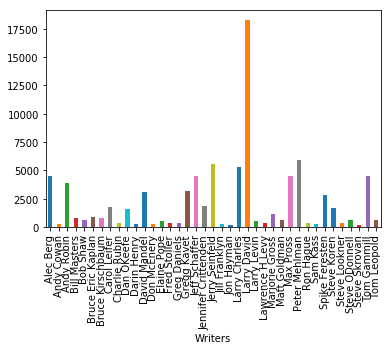

In [15]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
print("Number of Writers: " + str(len(writer_dialogue.groupby('Writers').SEID.count())))
writer_dialogue.groupby('Writers').SEID.count().plot.bar(ylim=0)
plt.show()

As stated above, there are 39 writers in the corpus. We can also see that Larry David contributed to many more lines of dialogue than any other writer in the series. This may cause a class imbalance when doing classification. 

To counter-act the class imbalance, we will reclassify the shows based on if Larry David had writing credit for that show, or not. We will then perform our classification and see if we can distinguish whether we can identify a show in which Larry David contributed or not.

In [16]:
#This will create a column that is True if Larry David had writting credit, and False if he didn't. 
#It does not distinguish between team-written episodes.

larry_david_episode = writer_dialogue.loc[writer_dialogue['Writers'] == 'Larry David']
larry_david_episode
writer_dialogue['LD_episode'] = writer_dialogue.SEID.isin(larry_david_episode.SEID)
print(writer_dialogue.head())

          Writers    SEID Character  \
0     Larry David  S01E00     JERRY   
1  Jerry Seinfeld  S01E00     JERRY   
2     Larry David  S01E00     JERRY   
3  Jerry Seinfeld  S01E00     JERRY   
4     Larry David  S01E00    GEORGE   

                                            Dialogue  DialogueIndex  SceneNum  \
0  Do you know what this is all about? Do you kno...              1  S01E00_1   
1  Do you know what this is all about? Do you kno...              1  S01E00_1   
2  (pointing at Georges shirt) See, to me, that b...              1  S01E00_2   
3  (pointing at Georges shirt) See, to me, that b...              1  S01E00_2   
4                                   Are you through?              2  S01E00_2   

   LD_episode  
0        True  
1        True  
2        True  
3        True  
4        True  


In [17]:
#Now we can drop duplicate lines and only include the dialogue and the class
clean_data = writer_dialogue.loc[:,['LD_episode','Dialogue']].drop_duplicates()
print(clean_data.shape)
clean_data.head()

(48830, 2)


,LD_episode,Dialogue
0,True,Do you know what this is all about? Do you kno...
2,True,"(pointing at Georges shirt) See, to me, that b..."
4,True,Are you through?
6,True,"You do of course try on, when you buy?"
8,True,"Yes, it was purple, I liked it, I dont actuall..."


0.33886954740937947


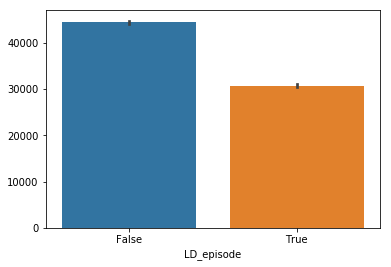

In [18]:
#Assuming equal contribution Larry David did 33.9% of the writting
print(len(clean_data.loc[clean_data['LD_episode'] == True])/len(clean_data.index))
sn.barplot(x=clean_data.LD_episode, y=clean_data.index)
plt.show()

Larry David contributed to 33.9% of the dialogue in Seinfeld. Though still uneven, a machine learning algorithm may have a better time distinguishing if Larry David contributed to an episode or not than identifying individual writers of the show. This doesn't address the problem that Larry David co-wrote a large amount of shows with Jerry Seinfeld.

#### Sci-kit Learn Method

Because we already have the dialogue in Data Frames, it will be easier to use Sci-Kit Learn instead of NLTK to do the classification. This will also give us experience using a new package. 

We will create features in the form of n-grams, up to 4-grams, to use try to classify the writers. We initially use Naive Bayes on a simple train/test split. Then we create a loop that does Cross Validation using Naive Bayes, Logistic Regression, Random Forests, and SVD.

In [19]:
# packages that we will need specifically for this code
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc

In [20]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
# We begin pre-processing the Dialogue and create a numerical catagory for an N-gram idenitifier.
clean_data = clean_data[pd.notnull(clean_data['Dialogue'])]
clean_data['category_id'] = clean_data['LD_episode'].factorize()[0]
category_id_df = clean_data[['LD_episode', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'LD_episode']].values)
clean_data.head()

,LD_episode,Dialogue,category_id
0,True,Do you know what this is all about? Do you kno...,0
2,True,"(pointing at Georges shirt) See, to me, that b...",0
4,True,Are you through?,0
6,True,"You do of course try on, when you buy?",0
8,True,"Yes, it was purple, I liked it, I dont actuall...",0


In [21]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
# we extended the ngrams to include more than uni- and bi-grams 
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 4), stop_words='english')

features = tfidf.fit_transform(clean_data.Dialogue).toarray()

labels = clean_data.category_id
features.shape

(48828, 8507)

In [22]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
# we extended the code to include tri and quadri-grams
N = 2
for LD_episode, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    quadrigrams = [v for v in feature_names if len(v.split(' ')) == 4]
    print("# '{}':".format(LD_episode))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))
    print("  . Most correlated quadrigrams:\n. {}".format('\n. '.join(quadrigrams[-N:])))

# 'False':
  . Most correlated unigrams:
. dont
. morty
  . Most correlated bigrams:
. getting married
. bubble boy
  . Most correlated trigrams:
. pretzels making thirsty
. hello oh hi
  . Most correlated quadrigrams:
. bennet robbins oppenheim taft
. sagman bennet robbins oppenheim
# 'True':
  . Most correlated unigrams:
. dont
. morty
  . Most correlated bigrams:
. getting married
. bubble boy
  . Most correlated trigrams:
. pretzels making thirsty
. hello oh hi
  . Most correlated quadrigrams:
. bennet robbins oppenheim taft
. sagman bennet robbins oppenheim


In [23]:
X_train, X_test, y_train, y_test = train_test_split(clean_data['Dialogue'], clean_data['LD_episode'], random_state = 42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
clf = MultinomialNB().fit(X_train_counts, y_train)

In [24]:
X_test_counts = count_vect.transform(X_test)
y_pred = clf.predict(X_test_counts)

In [25]:
print(accuracy_score(y_pred, y_test))

0.7097566969771443


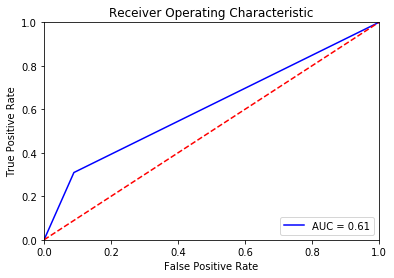

In [26]:
# the sklearn documentation seemed dated, https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# worked better
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

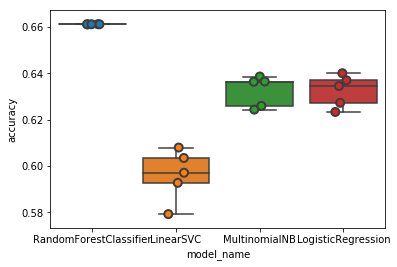

In [27]:
# adapted from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
# the features and labels are extended above to include more than uni- and bi-grams.

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sn.boxplot(x='model_name', y='accuracy', data=cv_df)
sn.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## Conclusions

The catch phrase counter seemed to perform well, though improvements could be made. Although at first pass it missed about 34% of the phrases this seemed to be caused by idiosyncratic use of spelling and punctuation, actions that were classified as a catch phrase, or ad-libbed lines that may have been said on the show, but were not in the script. Rewording phrases by hand did uncover nearly all the missed phrases, but was very time-consuming.

The classifier was not able to distinguish between Larry David episodes or Non-Larry David episodes. Consider that the split in the classification was $\frac{1}{3}$ True and $\frac{2}{3}$ false. The classifier must perform better than 66% for us to say with confidence that it identified a non-Larry David episode better than chance. Each Algorithm used was in the 60-66 percent range. This is exactly what we would expect for random chance. This means that the writers could produce very consistent dialogue over 9 seasons of television, which is probably what they wanted: a consistent product.


## References 

- Bird, Steven; Klein, Ewan; Loper, Edward, Natural Language Processing with Python (2009) O'Reilly
- Jarmul, Kathrine,  https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python 
- Li,  Susan, https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
- https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
- http://seinfeld.wikia.com/wiki/List_of_Seinfeld_sayings